#Hand written Digit Prediction- Classification Analysis*


The digits dataset consists of 8*8 pixel of digits.The  images attribute of the dataset stores 8*8 arrays of grayscale values for each image . We will use these arrays to visualise the first 4 images.The target aatribute of the dataset stores the digit each image represents.

#Import Library


In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

#Import data

In [4]:
 from sklearn.datasets import load_digits

In [5]:
df = load_digits()

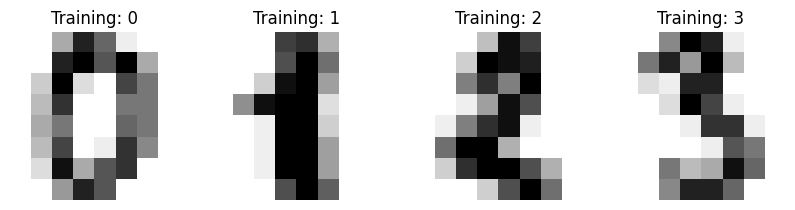

In [6]:
 _, axes = plt.subplots(nrows=1, ncols=4, figsize=(10,3))
 for ax, image, label in zip(axes, df.images, df.target):
     ax.set_axis_off()
     ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
     ax.set_title("Training: %i" %label)

#Data Preprocessing

Flatten Image


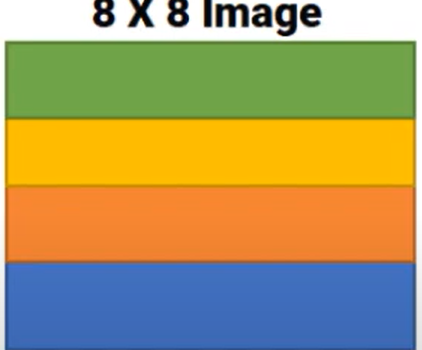

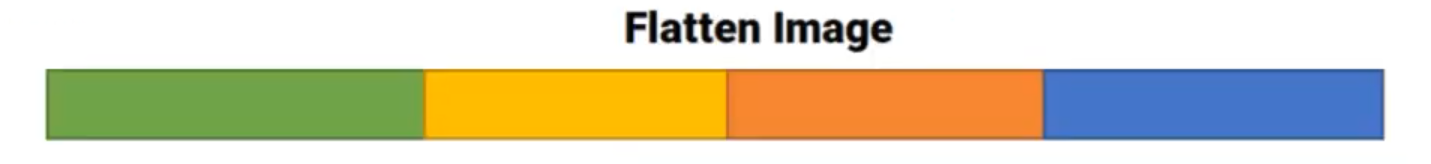

In [7]:
df.images.shape

(1797, 8, 8)

In [8]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [9]:
df.images[0].shape

(8, 8)

In [10]:
len(df.images)

1797

In [11]:
n_samples = len(df.images)
data = df.images.reshape((n_samples, -1))

In [12]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [13]:
data[0].shape

(64,)

In [15]:
data.shape

(1797, 64)

#Scaling Image data

In [16]:
data.min()

0.0

In [17]:
data.max()

16.0

In [18]:
data = data/16

In [19]:
data.min()

0.0

In [20]:
data.max()

1.0

In [21]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

#Train test split data

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test =train_test_split(data, df.target, test_size=0.3)

In [24]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

#Random forest model

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
rf = RandomForestClassifier()

In [27]:
rf.fit(X_train, y_train)

RandomForestClassifier()

#Predict test data

In [28]:
y_pred= rf.predict(X_test)

In [29]:
y_pred

array([1, 4, 4, 5, 9, 0, 7, 4, 3, 5, 0, 1, 7, 3, 4, 1, 6, 8, 8, 8, 6, 2,
       3, 6, 3, 9, 6, 9, 2, 9, 4, 8, 5, 1, 3, 0, 8, 4, 6, 7, 7, 2, 1, 3,
       8, 1, 8, 7, 9, 0, 1, 4, 0, 9, 9, 3, 1, 2, 8, 4, 1, 4, 9, 1, 3, 0,
       0, 8, 7, 7, 5, 3, 8, 6, 7, 2, 1, 7, 2, 1, 5, 4, 2, 3, 4, 8, 1, 3,
       5, 5, 8, 6, 8, 3, 5, 8, 1, 1, 0, 3, 8, 6, 6, 3, 1, 3, 8, 9, 4, 5,
       3, 4, 7, 6, 6, 0, 6, 1, 6, 2, 7, 8, 3, 7, 7, 9, 0, 8, 5, 4, 6, 9,
       5, 9, 9, 4, 5, 0, 4, 8, 1, 4, 1, 5, 5, 5, 1, 5, 7, 7, 5, 0, 1, 6,
       2, 0, 0, 6, 6, 7, 4, 5, 9, 1, 4, 0, 2, 6, 3, 9, 8, 3, 3, 1, 8, 1,
       7, 4, 1, 7, 5, 3, 1, 5, 2, 2, 3, 2, 5, 0, 0, 4, 9, 9, 9, 9, 6, 8,
       1, 7, 3, 8, 3, 4, 5, 9, 7, 3, 9, 9, 4, 6, 0, 3, 2, 9, 9, 0, 0, 6,
       5, 2, 6, 1, 4, 6, 5, 7, 5, 8, 9, 0, 5, 3, 1, 8, 5, 1, 0, 8, 6, 5,
       4, 3, 5, 1, 3, 5, 9, 3, 6, 4, 5, 4, 7, 7, 0, 7, 4, 0, 9, 8, 7, 8,
       7, 8, 5, 0, 3, 0, 4, 8, 4, 5, 7, 9, 6, 2, 6, 6, 5, 0, 4, 2, 9, 3,
       1, 3, 7, 7, 4, 1, 2, 3, 7, 2, 2, 8, 1, 6, 6,

#Model accuracy

In [30]:
from sklearn.metrics import confusion_matrix, classification_report

In [31]:
confusion_matrix(y_test, y_pred)

array([[56,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 55,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 46,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 57,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 54,  0,  0,  1,  0,  3],
       [ 0,  0,  0,  0,  0, 61,  0,  0,  0,  2],
       [ 0,  1,  0,  0,  1,  0, 48,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 58,  0,  0],
       [ 0,  1,  0,  0,  0,  1,  0,  0, 50,  0],
       [ 0,  0,  0,  3,  0,  0,  0,  0,  0, 41]])

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        56
           1       0.96      1.00      0.98        55
           2       1.00      1.00      1.00        46
           3       0.95      0.98      0.97        58
           4       0.98      0.93      0.96        58
           5       0.98      0.97      0.98        63
           6       1.00      0.96      0.98        50
           7       0.98      1.00      0.99        58
           8       0.98      0.96      0.97        52
           9       0.89      0.93      0.91        44

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540

